# Perceptron Learning Algorithm

The _Perceptron Learning Algorithm_, also called PLA or just __perceptron__ is the simplest and yet very powerful learning algorithm based on one neuron.

The idea behind this algorithm relies on two important concepts: the _input_ and its _weight_. Every input has its weight based on how important it is in the model. The PLA output to the machine is binary, either positive or negative and it is calculated as follows:

$$
    \text{sign}\left[ \sum_{i = 0}^n w_ix_i \right]
$$

Where in this case the value $w_0$ is the __threshold__ ($x_0$ is always 1) and the values $x_i$ and $w_i$ are the $i$-th values of the input and their respective weight. If we sum up all the $x_i$ and $w_i$ in two vectors, the formula is the following:

$$
    \text{sign}\left[ w^Tx \right]\, \hspace{10px} \text{where} \hspace{10px} w = \begin{bmatrix} w_0 & w_1 & \cdots & w_n \end{bmatrix}\, \hspace{10px} \text{and} \hspace{10px} x = \begin{bmatrix} x_0 \\ x_1 \\ \vdots \\ x_n \end{bmatrix}
$$

By hypothesizing that bot $w$ and $x$ are bi-dimensional, we can plot them into a plane and study the product between the two vectors. If the product is positive but should be negative, we try to rotate the $w$ vector to the negative part of the plane. If the product is negative and should be positive we try to rotate the $w$ vector to the positive half of the plane.

### Pseudocode

The algorithm can be achieved by implementing the following pseudocode:

$$
    \text{initiate weight}\,\, w\,\, \text{and},\,\, i \leftarrow 1
$$

$$
    \forall x_i\,\,\text{predict +1 if}\,\, w_1\cdot x_i >0\,\,\text{else}\,\, -1
$$

$$
    \text{if}\,\, y_i(w_1\cdot x_i) < 0\,\, w_1 \leftarrow w_i + x_iy_i
$$

$$
    i \leftarrow i + 1
$$


## Algorithm implementation

By starting from the pseudocode we can write a Python snippet that allows us to properly implement the aforementioned algorithm.

### Dataset

The first thing to do is to create the <tt>dataset</tt>. In this case, it is a very simple one, which associates the coordinates of $ x_i = (a_1, a_2, a_3) $ to its correct output $y_i$. The dataset is represented by a _list_ of lists.

In [1]:
# create dataset [(a_0, a_1, a_2, y), ...]
dataset = [
    [1,  3,   1,  -1], 
    [1,  1,   2,   1], 
    [1,  2.5, 2,  -1], 
    [1,  1,   4,  -1]
]

### Weight

After creating the dataset, it is important to create the <tt>weight vector</tt> to store the respective weight $w_i$ for every $x_i$ in the dataset.
>
Another important thing is to define the __hyper-parameters__ such as the _number of iterations_. This is important because if the dataset is not _linear_, meaning that the dataset is not liberally separable. If it is not separable the algorithm will fall into an infinite loop in which it constantly tries to reach an unreachable solution. The hyperparameters of the model can also be optimized meaning that there is an optimal threshold for the algorithm. In this case, the threshold's value is $50$ and is called <tt>epochs</tt> meaning that every iteration can be seen as an _epoch_.

In [2]:
# vector (list) of the parameters of the model [w_0, w_1, w_2]
w = [2.1, 1.4, -0.5]

# hyper-parameters (iterations)
epochs = 50

### Learning stage

The snippet starts with an infinite _while_ loop. Inside the loop, after displaying the number of iterations, the variable <tt>num_errors</tt> is defined, whose goal is to count the number of errors that occurred during the $i$-th iteration. 

Then, using a _for_ loop, we cycle through all the elements inside the dataset. It is important to note that, precisely because <tt>dataset</tt> is a list of lists, the <tt>elem</tt> variable contains a list. Inside the loop, the $y$ and $x$ coordinates are stored in local variables using the __slicing__ technique (<tt>elem[:3]</tt>).

After calculating the <tt>output</tt> as an explicit summation (that can be also achieved by a _nested for_ loop) the most important part of the algorithm: inside the _if_ statement the weights are adjusted to try to separate the dataset. Moreover, if the weights are being adjusted, it means that an error has occurred and the related variable is incremented.

Outside the statement, the available iteration number is increased. Eventually, there is the statement that lets the algorithm stop: the final _if_ statement breaks the infinite loop if there are no iterations available or if a correct solution has been found by the algorithm.

In [3]:
# repeat until no errors are found (or maximum number of iterations)
while True:
    
    print("remaining iterations: ", epochs)
        
    # number of errors
    num_errors = 0
    
    # for each element in the dataset
    for elem in dataset:

        # get class of element
        y = elem[3]

        # get coordinates
        x = elem[:3]

        # compute output h(x) = \sum_i w_i * x_i
        output = (w[0] * x[0]) + (w[1] * x[1]) + (w[2] * x[2])

        # compare output of h(x) with f(x)
        if (output >= 0 and y < 0) or (output < 0 and y > 0):
            # update parameters
            w[0] = w[0] + (x[0] * y)
            w[1] = w[1] + (x[1] * y)
            w[2] = w[2] + (x[2] * y)
            # update number of errors
            num_errors += 1
        
    # update iterations
    epochs -= 1

    # exit while loop if
    if (num_errors == 0) or (epochs == 0):
        break

print("solution found:       ", w)

remaining iterations:  50
remaining iterations:  49
remaining iterations:  48
remaining iterations:  47
remaining iterations:  46
remaining iterations:  45
remaining iterations:  44
remaining iterations:  43
remaining iterations:  42
remaining iterations:  41
remaining iterations:  40
remaining iterations:  39
remaining iterations:  38
remaining iterations:  37
remaining iterations:  36
remaining iterations:  35
remaining iterations:  34
remaining iterations:  33
remaining iterations:  32
remaining iterations:  31
remaining iterations:  30
remaining iterations:  29
solution found:        [8.1, -5.1, -1.5]


## Adding plots

To have a better understanding of how the PLA works, it is possible to trace some plots of the initial and final result of the separation algorithm.

The initial parameters are the same as the previous example: <tt>dataset</tt>, <tt>w</tt> and <tt>epochs</tt>. In this case an additional _library_ shall be imported to plot properly the graphs.

In [4]:
import matplotlib.pyplot as plt

# create dataset (x_0, x_1, x_2, y)
dataset = [
    [1,  3.4,  1.0,  -1], 
    [1,  1.5,  2.2,  -1], 
    [1,  3.6,  2.4,   1], 
    [1,  1.7,  3.6,  -1]
]

# initialize weights
w = [-1.0, -1.0, 1.0]

# stopping rule
epochs = 1000

### Initial state

To plot the initial state it is necessary to create a <tt>figure</tt> and plot the initial dataset. After setting the figure limits as $[-5,5]$, the initial state plot has been defined in the following way:

$$
    h(x) = ax + by + c \hspace{10px} = \hspace{10px} w_1x_1 + w_2x_2 + w_0
$$

$$
    x_1 = -\frac{w_1}{w_2}x_2 - \frac{w_0}{w_2}
    \hspace{40px}
    x_2 = -\frac{w_1}{w_2}x_1 - \frac{w_0}{w_2}
$$

Hence in this way, the initial parameters have been calculated in the snippet below and eventually plotted.

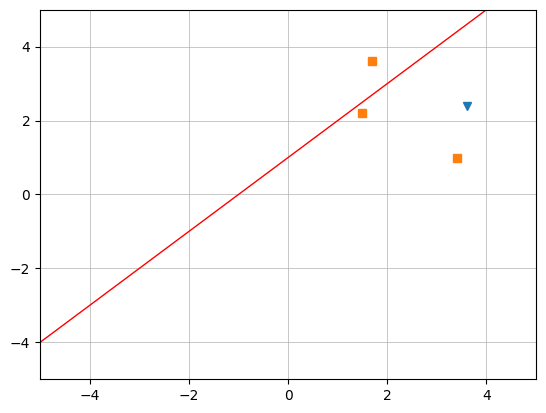

In [5]:
# create figure
fig = plt.figure()
plt.grid(linewidth = .5)

# plot dataset
plt.plot([item[1] for item in dataset if item[3] == 1], [item[2] for item in dataset if item[3] == 1], 'v');
plt.plot([item[1] for item in dataset if item[3] == -1], [item[2] for item in dataset if item[3] == -1], 's');

# set limits on axis
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# calculate initial parameters
x1 = -5 * (-w[1]/w[2]) - w[0]/w[2]
x2 = +5 * (-w[1]/w[2]) - w[0]/w[2]

# plot initial state
plt.plot([-5, 5], [x1, x2], color='red', linewidth = 1)



As we can see, the red line _does not_ split the plane by dividing the yellow squares and the blue triangles meaning that this model is wrong.

### Apply PLA

Now let's try plotting all the epochs of the algorithm: the code is very similar to the one displayed before with the only difference that now at every iteration the temporary state is displayed as well to have a better understanding of the algorithm work.

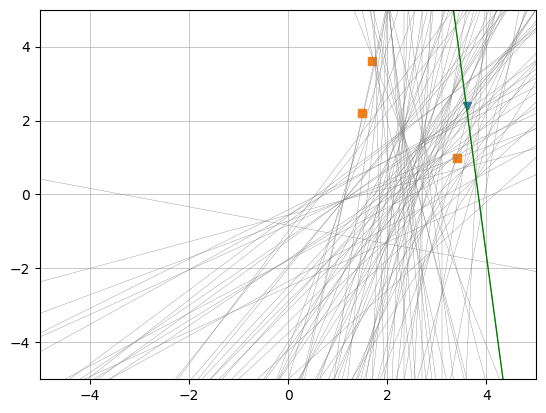

In [6]:
fig = plt.figure()
#ax = plt.axes()
plt.grid(linewidth = .5)

plt.plot([item[1] for item in dataset if item[3] == 1], [item[2] for item in dataset if item[3] == 1], 'v');
plt.plot([item[1] for item in dataset if item[3] == -1], [item[2] for item in dataset if item[3] == -1], 's');

plt.xlim(-5, 5)
plt.ylim(-5, 5)

# set checkpoint
num_errors = 0

while True:

    for datapoint in dataset:

        x = datapoint[:3]
        y = datapoint[3]

        output = 0

        dot_prod = (w[0] * x[0]) + (w[1] * x[1]) + (w[2] * x[2])
        # print(dot_prod)

        if (dot_prod >= 0 and y < 0) or (dot_prod <= 0 and y >= 0):
            w[0] = w[0] + (x[0] * y)
            w[1] = w[1] + (x[1] * y)
            w[2] = w[2] + (x[2] * y)
            num_errors += 1
        
    
    x1 = -5 * (-w[1]/w[2]) - w[0]/w[2] 
    x2 = +5 * (-w[1]/w[2]) - w[0]/w[2] 
    
    plt.plot([-5, 5], [x1, x2], color='grey', linewidth = 0.25);
    
    if num_errors == 0:
        break
    else:
        num_errors = 0
    
    epochs = epochs - 1
    
    if epochs == 0:
        print("step zero")
        break
        
plt.plot([-5, 5], [x1, x2], color='green', linewidth = 1);



By observing the graph we can see that now the green line separates the plane according to the color and shape of the initial dataset.